# Road Traffic Collision Severity

Road traffic accidents are a major cause of injury and death worldwide, with millions of people killed in traffic collisions each year. Predicting the severity of a collision can play a critical role in improving emergency response, identifying high-risk areas, and assessing the effectiveness of safety measures. Machine learning offers a powerful tool for predicting the severity of traffic collisions, by analyzing patterns in historical collision data and identifying factors that are predictive of severity. In this project, we aim to use machine learning models that can predict the severity of road traffic collisions based on a range of features, including weather conditions, road type, speed limit, vehicle manoeuvre and time of day.

### Import libraries

In [1]:
#!pip install xgboost
!pip install pytorch-tabnet
#!pip install sklearn
!pip install tensorflow
!pip install shap
!pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 302.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 60.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.15.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
%matplotlib inline
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from xgboost import XGBClassifier
import tensorflow
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import shap
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from google.colab import drive
import csv
import xlrd
 

### Load data

In [3]:
# Mount drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
#reading data
df_acc=pd.read_csv('/content/drive/My Drive/CIS5450/Dataset/Accidents0514.csv')
df_cas=pd.read_csv('/content/drive/My Drive/CIS5450/Dataset/Casualties0514.csv')
df_veh=pd.read_csv('/content/drive/My Drive/CIS5450/Dataset/Vehicles0514.csv')


Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.


## Data Pre-Processing

**Preview the dataset 'Accidents'**

In [ ]:
df_acc.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [ ]:
df_acc.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [ ]:
print(df_acc['Accident_Severity'].unique())
print(df_acc['Road_Type'].unique())
print(df_acc['Weather_Conditions'].unique())
print(df_acc['Light_Conditions'].unique())

[2 3 1]
[6 3 2 1 7 9]
[ 2  1  9  3  8  4  5  7  6 -1]
[1 4 7 5 6]


**Preview the dataset 'Vehicles'**

In [ ]:
df_veh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [ ]:
df_veh.dtypes

Accident_Index                      object
Vehicle_Reference                    int64
Vehicle_Type                         int64
Towing_and_Articulation              int64
Vehicle_Manoeuvre                    int64
Vehicle_Location-Restricted_Lane     int64
Junction_Location                    int64
Skidding_and_Overturning             int64
Hit_Object_in_Carriageway            int64
Vehicle_Leaving_Carriageway          int64
Hit_Object_off_Carriageway           int64
1st_Point_of_Impact                  int64
Was_Vehicle_Left_Hand_Drive?         int64
Journey_Purpose_of_Driver            int64
Sex_of_Driver                        int64
Age_of_Driver                        int64
Age_Band_of_Driver                   int64
Engine_Capacity_(CC)                 int64
Propulsion_Code                      int64
Age_of_Vehicle                       int64
Driver_IMD_Decile                    int64
Driver_Home_Area_Type                int64
dtype: object

**Preview the dataset 'Casualties'**

In [ ]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [ ]:
df_cas.dtypes

Accident_Index                        object
Vehicle_Reference                      int64
Casualty_Reference                     int64
Casualty_Class                         int64
Sex_of_Casualty                        int64
Age_of_Casualty                        int64
Age_Band_of_Casualty                   int64
Casualty_Severity                      int64
Pedestrian_Location                    int64
Pedestrian_Movement                    int64
Car_Passenger                          int64
Bus_or_Coach_Passenger                 int64
Pedestrian_Road_Maintenance_Worker     int64
Casualty_Type                          int64
Casualty_Home_Area_Type                int64
dtype: object

**Let's get rid of the columns we are not going to use.**<br>
We drop the columns before moerging the datasets to optimize the merge.

In [5]:
df_veh.drop(["Driver_Home_Area_Type", "Propulsion_Code","Vehicle_Reference"],axis=1,inplace=True) 

df_cas.drop(["Pedestrian_Road_Maintenance_Worker", "Casualty_Reference", "Casualty_Home_Area_Type","Vehicle_Reference"],axis=1,inplace=True)
 
df_acc.drop(["LSOA_of_Accident_Location","Did_Police_Officer_Attend_Scene_of_Accident", 
             "Pedestrian_Crossing-Physical_Facilities", "Pedestrian_Crossing-Human_Control","1st_Road_Class","2nd_Road_Class", "2nd_Road_Number", 
             "Junction_Control", "Junction_Detail", "Local_Authority_(Highway)","Local_Authority_(District)",
             "Location_Easting_OSGR","Location_Northing_OSGR","1st_Road_Number"],axis=1,inplace=True)                           
 
                            

**Merging the three datasets (accidents, vehicles and casualties) to get one dataset:**

In [6]:
df = df_acc.merge(df_veh,on='Accident_Index').merge(df_cas,on='Accident_Index')
df.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Casualty_Type
0,200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,...,3,1,37,7,2,1,1,0,0,0
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,...,2,1,37,7,3,0,0,0,4,11
2,200501BS00003,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,...,1,1,62,9,3,0,0,0,0,9
3,200501BS00003,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,...,1,1,62,9,3,0,0,0,0,9
4,200501BS00004,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,...,3,1,30,6,3,5,2,0,0,0


In [ ]:
df.shape

(4287593, 46)

In [ ]:
df.columns

Index(['Accident_Index', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Road_Type', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Driver_IMD_Decile',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',

This dataframe has numerical codes for all the different values in each column. To make the data more readable, we can replace the numerical codes with their corresponding labels by cross-referencing the the lookup file which contains the text description of all codes in the three files.

In [ ]:
xl_file = '/content/drive/My Drive/CIS5450/Dataset/Road-Accident-Safety-Data-Guide.xls'

police_df = pd.read_excel(xl_file, sheet_name='Police Force')
light_df = pd.read_excel(xl_file, sheet_name='Light Conditions')
weather_df = pd.read_excel(xl_file, sheet_name='Weather')
surface_df = pd.read_excel(xl_file, sheet_name='Road Surface')
vehicle_type = pd.read_excel(xl_file, sheet_name='Vehicle Type')
vehicle_manoeuvre  = pd.read_excel(xl_file, sheet_name='Vehicle Manoeuvre')
skidding = pd.read_excel(xl_file, sheet_name='Skidding and Overturning')
journey_purpose  = pd.read_excel(xl_file, sheet_name='Journey Purpose')
age_band = pd.read_excel(xl_file, sheet_name='Age Band')
accident_severity  = pd.read_excel(xl_file, sheet_name='Accident Severity')
casualty_type  = pd.read_excel(xl_file, sheet_name='Casualty Type')
casualty_class = pd.read_excel(xl_file, sheet_name='Casualty Class')

In [7]:
# Adding Time_of_Day and Month as features to the dataset as they might contribute towards our analysis
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['Time_of_Day'] = df['Time'].dt.hour
df['Month'] = df['Date'].dt.month


Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


In [ ]:
#checking missing values percentage
df.isnull().mean()*100

Accident_Index                      0.000000
Longitude                           0.005971
Latitude                            0.005971
Police_Force                        0.000000
Accident_Severity                   0.000000
Number_of_Vehicles                  0.000000
Number_of_Casualties                0.000000
Date                                0.000000
Day_of_Week                         0.000000
Time                                0.006157
Road_Type                           0.000000
Speed_limit                         0.000000
Light_Conditions                    0.000000
Weather_Conditions                  0.000000
Road_Surface_Conditions             0.000000
Special_Conditions_at_Site          0.000000
Carriageway_Hazards                 0.000000
Urban_or_Rural_Area                 0.000000
Vehicle_Type                        0.000000
Towing_and_Articulation             0.000000
Vehicle_Manoeuvre                   0.000000
Vehicle_Location-Restricted_Lane    0.000000
Junction_L

## Exploratory Data Analysis

How many accidents have been recorded in the dataset?

In [ ]:
df['Accident_Index'].nunique()

1640597

**Correlation between features**

<ipython-input-6-f9198701c616>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


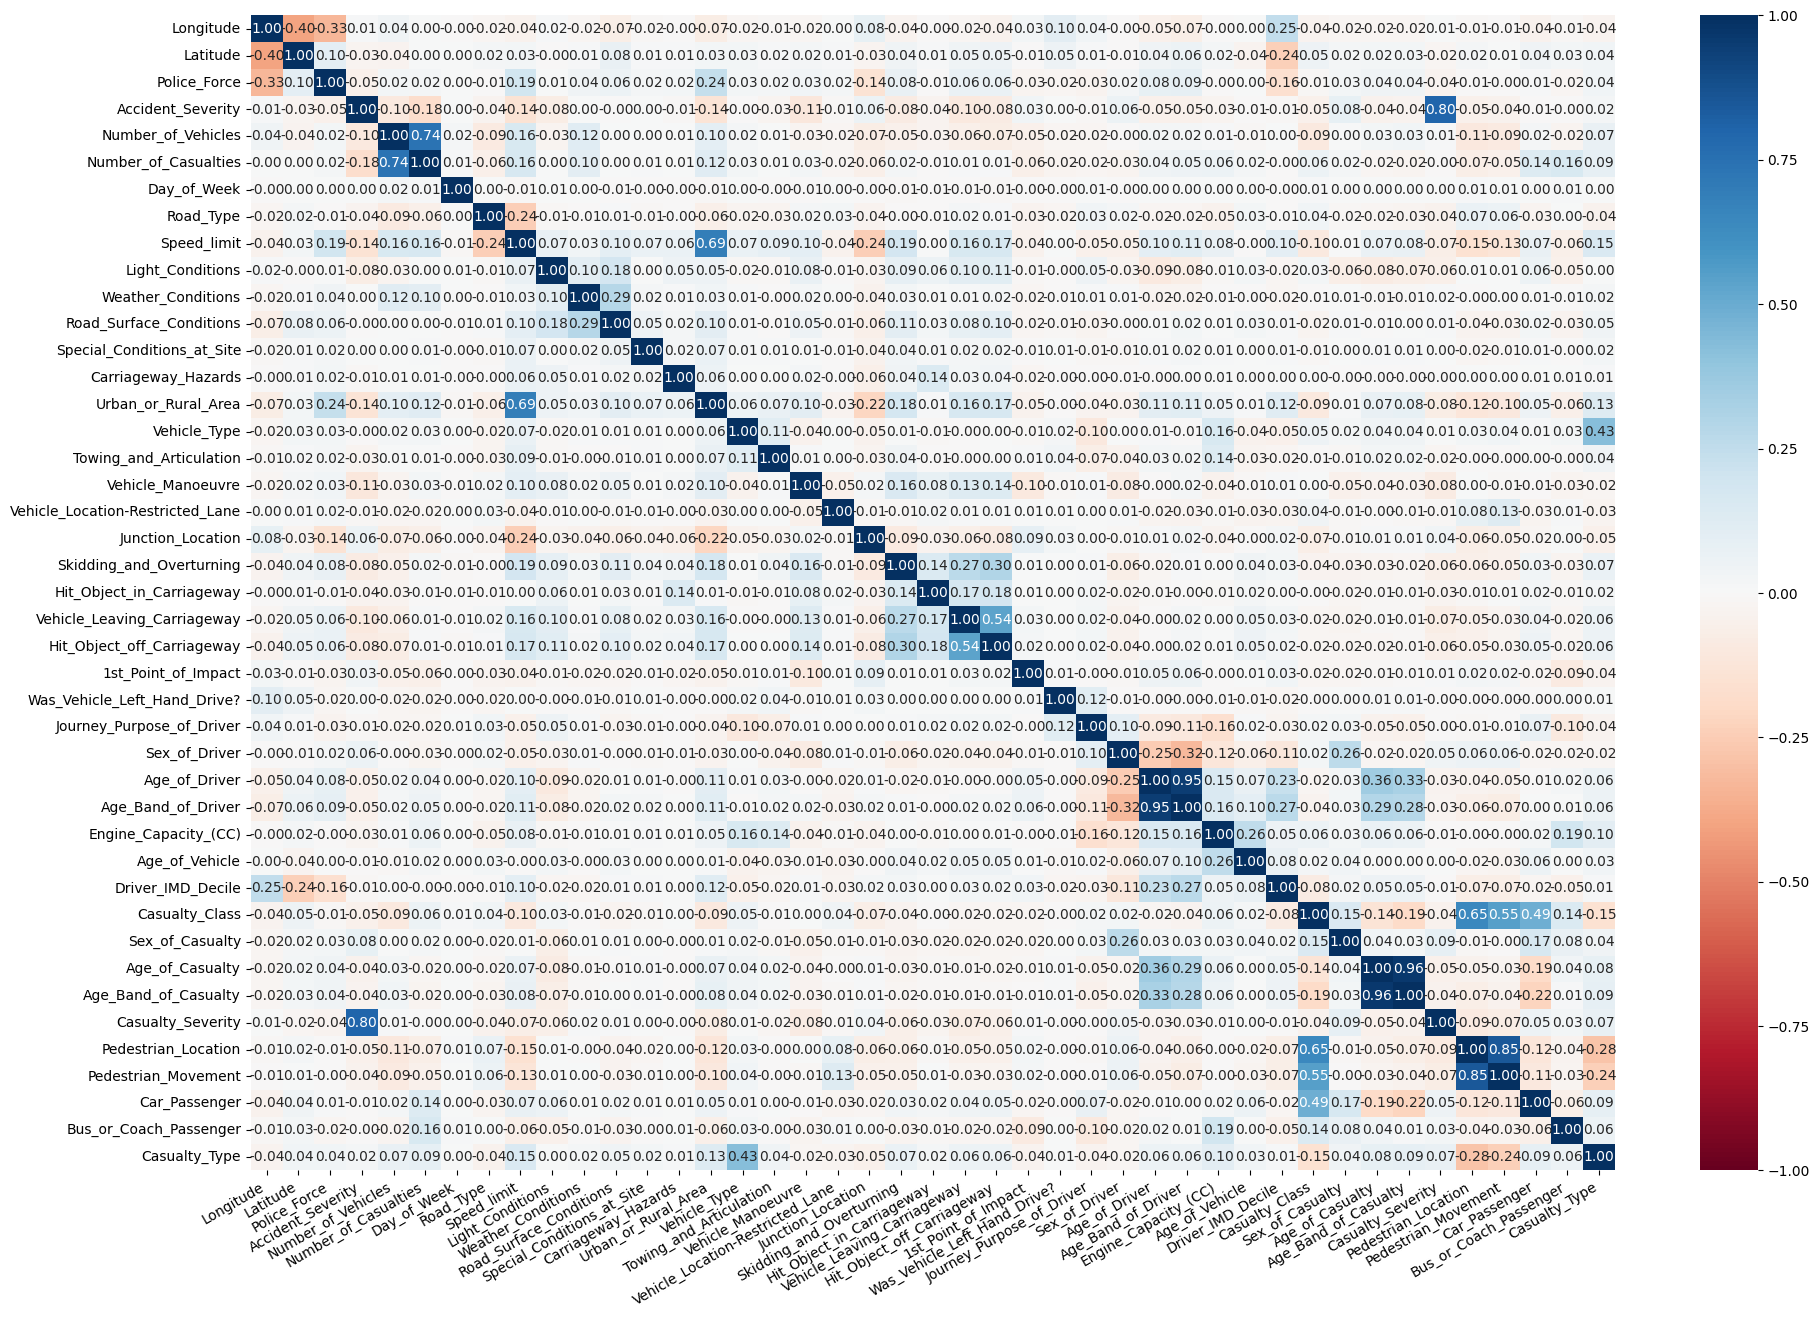

In [6]:
cor_fig, cor_ax = plt.subplots(figsize=(22, 15))
corr_matrix = df.corr()

cor_ax = sns.heatmap(corr_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, annot_kws={"fontsize": 10, "ha": "center"}, fmt=".2f")
plt.xticks(rotation=30, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)

# plt.savefig('correlation.png')
plt.show()


### Conclusions:

We cannot find a meaningful correlation between any two variables from the above correlation matrix. <br>

*   'Casualty Severity' is highly correlated to 'Accident Severity' but this is intuitive.

*   Features like 'Sex of Casualty' and 'Age band of casualty' are correlated to 'Sex of Driver' and 'Age band of driver' but this is intuitive too since there's a good chance that the driver may have been a casualty in the accident.

*   Correlation between 'Pedestrian location' and 'Pedestrian movement' is also intuitive.

*   Correlation between 'Number of casualties' and 'Number of vehicles' is also intuitive as more the number of vehicles involved in an accident, more will be the number of people involved in the accident.

* One notable correation is the negative correlation between speed limit and accident severity. This is because in the dataset, 1 is classified as the highest severity of accidents and 3 is the lowest. So a higher speed limit intuitively implies that the accident would tend to be more severe.





**Number of accidents per year**

In [ ]:
df['Year'] = df['Date'].dt.year

<ipython-input-23-021ab4eaf96d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, x='Year', shrink=8, palette='GnBu')


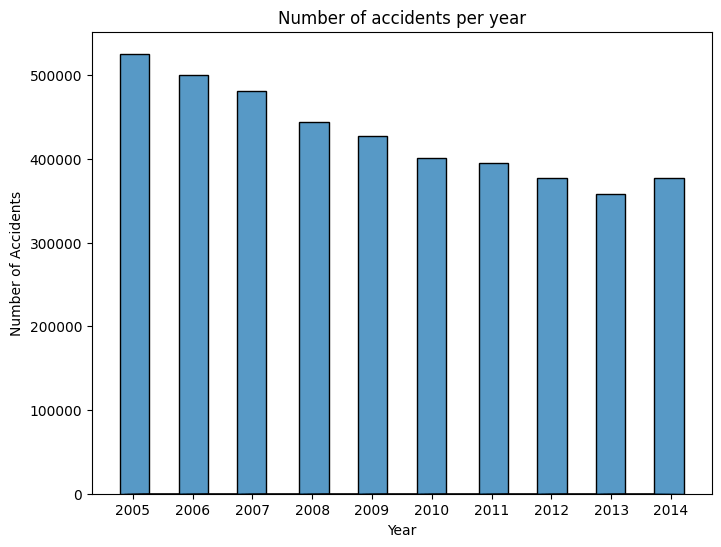

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Year', shrink=8, palette='GnBu')
plt.title('Number of accidents per year')
plt.xlabel('Year')
ax.set_xticks(df['Year'].unique())
plt.ylabel('Number of Accidents')
plt.show()

We can see that the number of accidents have been decreasing in general with the exception of an increase in the year 2014 as comparesd to 2013.

**Number of accidents per year by accident severity**

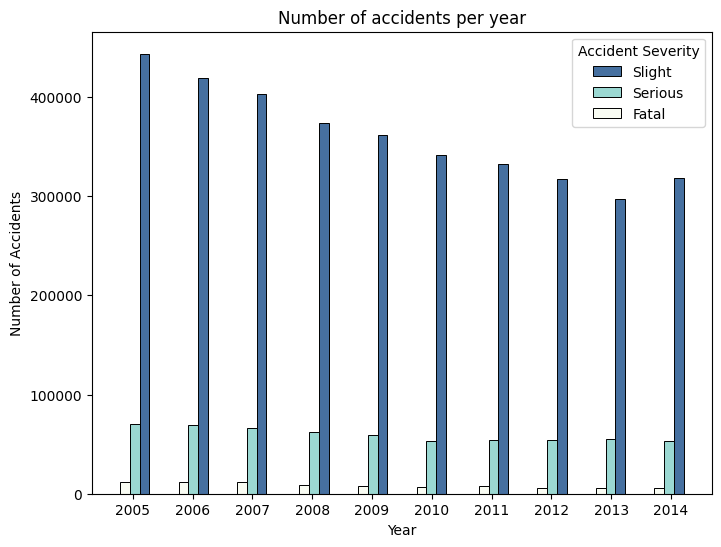

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Year', hue='Accident_Severity', multiple='dodge', shrink=8, palette='GnBu')
plt.title('Number of accidents per year')
plt.xlabel('Year')
ax.set_xticks(df['Year'].unique())
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity', loc='upper right', labels=["Slight", "Serious", "Fatal"])
plt.show()

**Number of accidents by day of the week**

<ipython-input-25-8a1db3d620de>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data=df, x='Day_of_Week', shrink=8, palette='GnBu')


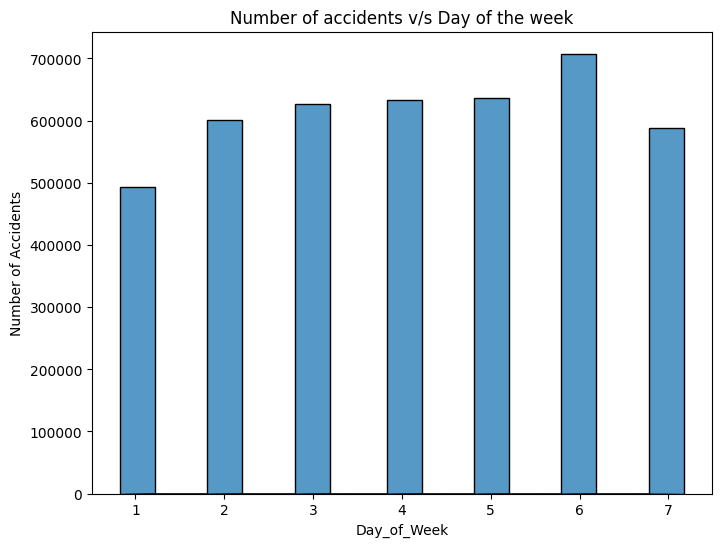

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Day_of_Week', shrink=8, palette='GnBu')
plt.title('Number of accidents v/s Day of the week')
plt.xlabel('Day_of_Week')
ax.set_xticks(df['Day_of_Week'].unique())
plt.ylabel('Number of Accidents')
plt.show()

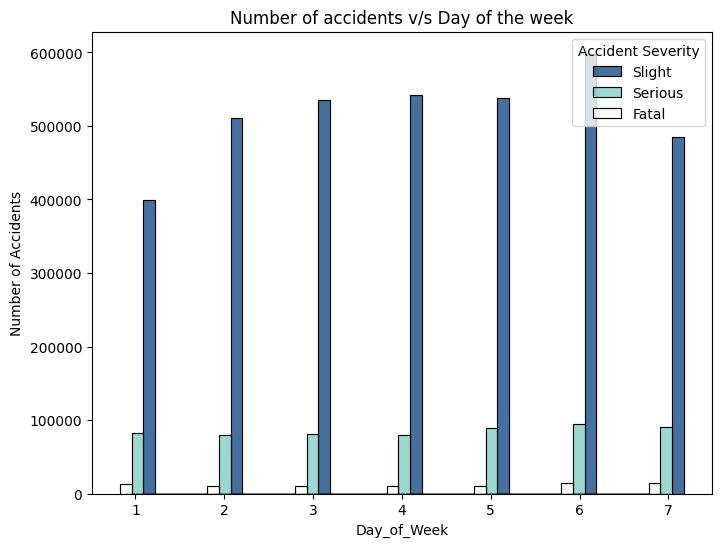

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Day_of_Week', hue='Accident_Severity', multiple='dodge', shrink=8, palette='GnBu')
plt.title('Number of accidents v/s Day of the week')
plt.xlabel('Day_of_Week')
ax.set_xticks(df['Day_of_Week'].unique())
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity', loc='upper right', labels=["Slight", "Serious", "Fatal"])
plt.show()

We can see that 6 i.e. Friday has the highest number of accidents. By common knowledge, we can hypothesize that since more people are out on the roads on a Friday, there are more accidents, but we cannot conclude so from the dataset alone.

In [ ]:
accidents = df['Age_Band_of_Casualty'].value_counts().reset_index().rename(columns = {'index':'Age_Band_of_Casualty','Age_Band_of_Casualty':"#Accidents"}).sort_values(by='Age_Band_of_Casualty')

mapping_dict = dict(zip(age_band['code'], age_band['label']))
accidents['Age_Band_of_Casualty'] = accidents['Age_Band_of_Casualty'].map(mapping_dict)

accidents



,Age_Band_of_Casualty,#Accidents
10,Data missing or out of range,85973
11,0 - 5,67464
9,6 - 10,109394
6,11 - 15,170998
2,16 - 20,591291
3,21 - 25,543918
0,26 - 35,836903
1,36 - 45,734957
4,46 - 55,534864
5,56 - 65,319169


We can see that the age group of 26-35 has the highest number of accidents. By common knowledge, we can hypothesize that this is the age band of people who are working and are out on the roads for some reason. More people means more vehicles and thus more accidents. However, we cannot conclude this from the dataset alone.

**Number of accidents in different weather, light and road conditions**


In [ ]:
accidents_by_weather = df['Weather_Conditions'].value_counts().reset_index().rename(columns = {'index':'Weather_Conditions','Weather_Conditions':"#Accidents"})

mapping_dict = dict(zip(weather_df['code'], weather_df['label']))
accidents_by_weather['Weather_Conditions'] = accidents_by_weather['Weather_Conditions'].map(mapping_dict)

accidents_by_weather

,Weather_Conditions,#Accidents
0,Fine no high winds,3411674
1,Raining no high winds,525233
2,Other,94090
3,Unknown,73619
4,Raining + high winds,61450
5,Fine + high winds,54803
6,Fog or mist,31104
7,Snowing no high winds,29463
8,Snowing + high winds,5707
9,Data missing or out of range,450


**Number of accidents in different light conditions**

In [ ]:
accidents_by_light = df['Light_Conditions'].value_counts().reset_index().rename(columns = {'index':'Light_Conditions','Light_Conditions':"#Accidents"})

mapping_dict = dict(zip(light_df['code'], light_df['label']))
accidents_by_light['Light_Conditions'] = accidents_by_light['Light_Conditions'].map(mapping_dict)

accidents_by_light

,Light_Conditions,#Accidents
0,Daylight,3169618
1,Darkness - lights lit,812363
2,Darkness - no lighting,245338
3,Darkness - lighting unknown,41578
4,Darkness - lights unlit,18696


**Number of accidents in different road type**


In [ ]:
accidents = df['Road_Surface_Conditions'].value_counts().reset_index().rename(columns = {'index':'Road_Surface_Conditions','Road_Surface_Conditions':"#Accidents"})

mapping_dict = dict(zip(surface_df['code'], surface_df['label']))
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].map(mapping_dict)

accidents

,Road_Surface_Conditions,#Accidents
0,Dry,2909792
1,Wet or damp,1258492
2,Frost or ice,81435
3,Snow,27112
4,Flood over 3cm. deep,5938
5,Data missing or out of range,4824


In [ ]:
accidents = df['Skidding_and_Overturning'].value_counts().reset_index().rename(columns = {'index':'Skidding_and_Overturning','Skidding_and_Overturning':"#Accidents"})

mapping_dict = dict(zip(skidding['code'], skidding['label']))
accidents['Skidding_and_Overturning'] = accidents['Skidding_and_Overturning'].map(mapping_dict)

accidents

,Skidding_and_Overturning,#Accidents
0,None,3671406
1,Skidded,456980
2,Skidded and overturned,90767
3,Overturned,64946
4,Jackknifed,2154
5,Jackknifed and overturned,1175
6,Data missing or out of range,165


We cannot make inferences about the correlation between weather, light and road conditions by looking at the features individually. However, when put together, these features could contribute towards analysing the severity of a collision. 

**Number of accidents by vehicle type, vehicle manouvre and the location of an accident.**



In [ ]:
accidents = df['Vehicle_Type'].value_counts().reset_index().rename(columns = {'index':'Vehicle_Type','Vehicle_Type':"#Accidents"})

mapping_dict = dict(zip(vehicle_type['code'], vehicle_type['label']))
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].map(mapping_dict)

accidents

,Vehicle_Type,#Accidents
0,Car,3282821
1,Van / Goods 3.5 tonnes mgw or under,197878
2,Pedal cycle,192960
3,Bus or coach (17 or more pass seats),108133
4,Motorcycle over 500cc,103753
5,Goods 7.5 tonnes mgw and over,89601
6,Motorcycle 125cc and under,76767
7,Taxi/Private hire car,74218
8,Motorcycle 50cc and under,40517
9,Other vehicle,32403


We can see that cars are invloved in more accidents than any other type of vehicle.

In [ ]:
accidents_by_road_type = df['Road_Type'].value_counts().reset_index().rename(columns = {'index':'Road_Type','Road_Type':"#Accidents"})

road_type = pd.read_excel(xl_file, sheet_name='Road Type')
mapping_dict = dict(zip(road_type['code'], road_type['label']))

accidents_by_road_type['Road_Type'] = accidents_by_road_type['Road_Type'].map(mapping_dict)
accidents_by_road_type

,Road_Type,#Accidents
0,Single carriageway,3088654
1,Dual carriageway,794400
2,Roundabout,267333
3,One way street,66962
4,Slip road,49364
5,Unknown,20880


We can see that a single carriageway road sees more accidents than other type of roads.

In [ ]:
accidents = df['Vehicle_Manoeuvre'].value_counts().reset_index().rename(columns = {'index':'Vehicle_Manoeuvre','Vehicle_Manoeuvre':"#Accidents"})

mapping_dict = dict(zip(vehicle_manoeuvre['code'], vehicle_manoeuvre['label']))
accidents['Vehicle_Manoeuvre'] = accidents['Vehicle_Manoeuvre'].map(mapping_dict)


accidents

,Vehicle_Manoeuvre,#Accidents
0,Going ahead other,2032799
1,Turning right,397325
2,Slowing or stopping,349656
3,Waiting to go - held up,320119
4,Going ahead right-hand bend,190874
5,Going ahead left-hand bend,174839
6,Parked,150936
7,Moving off,142231
8,Turning left,119527
9,Overtaking moving vehicle - offside,84079


We can see that vehicles have a higher probability of meeting with an accident when they are going ahead another vehicle.

In [ ]:
accidents = df['Journey_Purpose_of_Driver'].value_counts().reset_index().rename(columns = {'index':'Journey_Purpose_of_Driver','Journey_Purpose_of_Driver':"#Accidents"})

mapping_dict = dict(zip(journey_purpose['code'], journey_purpose['label']))
accidents['Journey_Purpose_of_Driver'] = accidents['Journey_Purpose_of_Driver'].map(mapping_dict)

accidents

,Journey_Purpose_of_Driver,#Accidents
0,Other/Not known (2005-10),1972010
1,Not known,1069866
2,Journey as part of work,711499
3,Commuting to/from work,382154
4,Data missing or out of range,63306
5,Taking pupil to/from school,45245
6,Other,30867
7,Pupil riding to/from school,12646


Of the reasons known to us, we can see that more number of people traveling due to work meet with an accident that people who are traveling by road for other reasons. This, combined with our observation above that the age band of casualty that sees that most accidents is 26 - 35, can give us an insight into the dataset about the group of people who are most likely to meet with an accident.

In [ ]:
df.Accident_Severity.value_counts()

3    3607415
2     596571
1      83607
Name: Accident_Severity, dtype: int64

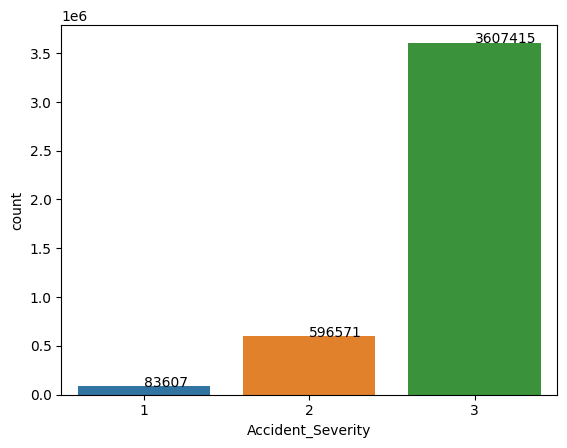

In [ ]:
ax = sns.countplot(x='Accident_Severity', data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.5))
    
mapping_dict = dict(zip(journey_purpose['code'], journey_purpose['label']))
# display the plot
plt.show()

We can see that our dataset is highly imbalanced with **83,607 'Fatal accidents', 596,571 'Serious accidents' and 3,607,415 'Slight accidents'.**

## Models and their performance


**Splitting our dataset into X and y to separate the predictors from the target** 

In [8]:
df = df.dropna()
X = df.drop(columns=['Accident_Severity','Accident_Index', 'Date', 'Time'])
Y = df.Accident_Severity

**Create training and testing sets**<br>
In cases with balanced data, we can generate a train/test set simply by randomly assigning a part of the data to a test set. However, in imbalanced data, there is a big risk of ending up with almost no cases of the minority class in the test set. <br>
Since our dataset is imbalanced, we use stratified sampling, which will force the same class balance on the train and test dataset as the original data.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=df.Accident_Severity)

In [ ]:
X.dtypes

Longitude                           float64
Latitude                            float64
Police_Force                          int64
Number_of_Vehicles                    int64
Number_of_Casualties                  int64
Day_of_Week                           int64
Road_Type                             int64
Speed_limit                           int64
Light_Conditions                      int64
Weather_Conditions                    int64
Road_Surface_Conditions               int64
Special_Conditions_at_Site            int64
Carriageway_Hazards                   int64
Urban_or_Rural_Area                   int64
Vehicle_Type                          int64
Towing_and_Articulation               int64
Vehicle_Manoeuvre                     int64
Vehicle_Location-Restricted_Lane      int64
Junction_Location                     int64
Skidding_and_Overturning              int64
Hit_Object_in_Carriageway             int64
Vehicle_Leaving_Carriageway           int64
Hit_Object_off_Carriageway      

# Logistic Regression Baseline Model (full dataset)

Logistic regression was chosen as the baseline, as it is one of the most simple classification models.<br>
In the case of three classes, we can use multinomial logistic regression to predict the probability of each class. The basic idea is to model the probability of each class as a function of the input features using a multinomial logistic function.

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train.tolist())
print(f"Classification report on the test set (when model trained on imbalanced data) is:")
print(classification_report(y_test, clf.predict(X_test)))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report on the test set (when model trained on imbalanced data) is:
              precision    recall  f1-score   support

           1       0.30      0.00      0.00     16721
           2       0.65      0.01      0.02    119294
           3       0.84      1.00      0.91    721400

    accuracy                           0.84    857415
   macro avg       0.60      0.34      0.31    857415
weighted avg       0.81      0.84      0.77    857415



The accuracy in this case is 84%.

## Undersampling

An class imbalance creates a bias where the machine learning model tends to predict the majority class. Undersampling is a technique which would decrease the proportion of the majority class until the number is similar to the minority class. Since the size of our minority class is 83,607, we would still have a good amount of data to work with.

In [11]:
# Create an undersampler
under = RandomUnderSampler()

# Fit and transform the data using the undersampler
X_undersample, y_undersample = under.fit_resample(X, Y)

# Check the new class distribution
unique, counts = np.unique(y_undersample, return_counts=True)
print("New class distribution:", dict(zip(unique, counts)))

New class distribution: {1: 83605, 2: 83605, 3: 83605}


In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=42)


# What are the models we are using, and why? 

## Logistic Regression: 

Relevance: 

Logistic Regression is a simple and widely used model for binary and multi-class classification problems. It is relevant for predicting road traffic collision severity because it can handle categorical and continuous input features, and it estimates probabilities for each class.

Advantages:

Easy to implement and interpret.
Less prone to overfitting.
Can be used for feature selection by analyzing coefficients.

Disadvantages:

Assumes a linear relationship between features and the log-odds of the target variable.
Limited predictive power compared to more complex models.
May struggle with highly correlated features.

## Random Forest Classifier:

Relevance: 

Random Forest is an ensemble learning method that constructs multiple decision trees and outputs the mode of the classes. It is relevant for this problem as it can handle non-linear relationships, works well with a mix of categorical and continuous features, and can provide an estimate of feature importance.

Advantages:

Robust to overfitting.
Can handle high-dimensional data.
Good predictive performance.

Disadvantages:

Can be computationally expensive.
Less interpretable compared to simpler models like logistic regression.
Longer training time.

## Gaussian Naive Bayes

Relevance: 

Gaussian Naive Bayes is a simple and fast probabilistic classifier based on applying Bayes' theorem with strong independence assumptions between features. It is relevant for this problem as it can handle continuous and categorical features and works well for multi-class problems.

Advantages:

Fast training and prediction time.
Performs well with small datasets.
Simple and easy to implement.

Disadvantages:

Assumes independence between features, which is often unrealistic.
May perform poorly when there are highly correlated features.

## Gradient Boosting Classifier

Relevance: 

Gradient Boosting is an ensemble learning method that builds multiple weak learners (decision trees) in a sequential manner, where each subsequent tree corrects the errors of the previous tree. It can handle non-linear relationships and mixed data types, making it relevant for predicting road traffic collision severity.

Advantages:

High predictive power.
Can handle high-dimensional data.
Robust to outliers.

Disadvantages:

Longer training time.
Prone to overfitting if not properly tuned.
Less interpretable compared to simpler models.
 
## XGBoost Classifier

Relevance: 

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of gradient boosting, providing better computational efficiency and parallelization. It is relevant for the problem because of its ability to handle non-linear relationships, mixed data types, and large datasets.

Advantages:

High predictive power.
Faster training time compared to other boosting algorithms.
Regularization term to prevent overfitting.

Disadvantages:

Less interpretable compared to simpler models.
Requires careful tuning of hyperparameters.
Can be computationally expensive for large datasets.

## TabNet Classifier 

Relevance: 

TabNet is a deep learning model specifically designed for tabular data, which can automatically learn feature interactions and representations. It is relevant for predicting road traffic collision severity because it can handle non-linear relationships and mixed data types.

Advantages:

Can automatically learn feature interactions.
High predictive power.
Can handle high-dimensional data.

Disadvantages:

Less interpretable compared to simpler models.
Requires more computational resources and longer training time.
May require large amounts of data for optimal performance.

# Logistic regression on under-sampled data 

In [14]:
clf_under = LogisticRegression()
clf_under.fit(X_train, y_train)
print(f"Classification report on the test set (when model trained on undersampled data) is:")
print(classification_report(y_test, clf_under.predict(X_test)))


Classification report on the test set (when model trained on undersampled data) is:
              precision    recall  f1-score   support

           1       0.55      0.63      0.59     25028
           2       0.42      0.33      0.37     24851
           3       0.56      0.59      0.57     25366

    accuracy                           0.52     75245
   macro avg       0.51      0.52      0.51     75245
weighted avg       0.51      0.52      0.51     75245



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier:

Random forest was implemented as it is commonly used for classification problems. Random forests are well-suited to this task because they can handle large datasets with a multitude of features, and they are able to make accurate predictions even when the data is highly unbalanced or when there are missing values

In [13]:

# Fit a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.90      0.90     25028
           2       0.88      0.81      0.84     24851
           3       0.85      0.92      0.89     25366

    accuracy                           0.88     75245
   macro avg       0.88      0.88      0.88     75245
weighted avg       0.88      0.88      0.88     75245



The accuracy in this case is 88%

# Gaussian Naive Bayes Model

The GNB model can be trained on a dataset with labeled examples, where each example is represented as a set of features and a corresponding class label. During training, the GNB model estimates the mean and variance of each feature for each class label. These estimates are then used to compute the probability of a new example belonging to each class label, given its features.

During prediction, the GNB model calculates the likelihood of the features given each class label using the Gaussian probability density function, and then applies Bayes' theorem to compute the posterior probability of each class label given the features. The class label with the highest posterior probability is then predicted as the output of the GNB model.

In [15]:
# Fit a Gaussian Naive Bayes model on the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.59      0.63     25028
           2       0.68      0.60      0.63     24851
           3       0.70      0.87      0.78     25366

    accuracy                           0.69     75245
   macro avg       0.68      0.69      0.68     75245
weighted avg       0.68      0.69      0.68     75245



The accuracy in this case is 69%

# Gradient Boosting Classifier


Gradient Boosting Classifier (GBC) is a popular ensemble learning method for classification problems. It is based on the idea of building a sequence of weak models (usually decision trees) that are trained to correct the errors of the previous model in the sequence.

During training, the GBC model fits a sequence of decision trees to the training data. Each tree is fit to the residuals (i.e., the errors) of the previous tree in the sequence, so that each tree tries to improve the predictions of the previous tree. The final prediction of the GBC model is a weighted sum of the predictions of all the trees in the sequence.

The GBC model uses gradient descent optimization to minimize a loss function that measures the difference between the predicted class probabilities and the true class labels. The gradient of the loss function with respect to the predicted probabilities is used to update the parameters of the GBC model, so that it can better fit the training data.

In [16]:
# Fit a Gradient Boosting Classifier model on the training data
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81     25028
           2       0.84      0.71      0.77     24851
           3       0.80      0.93      0.86     25366

    accuracy                           0.82     75245
   macro avg       0.82      0.82      0.81     75245
weighted avg       0.82      0.82      0.81     75245



The accuracy in this case is 82%

# XGBoost Classifier

XGBoost (Extreme Gradient Boosting) Classifier is a popular implementation of the Gradient Boosting method for classification problems. It is designed to be efficient, scalable and accurate on large and complex datasets.

The XGBoost model is similar to the GBC model in that it fits a sequence of decision trees to the training data. However, it uses a more advanced optimization algorithm that can handle both linear and tree-based models. It also includes regularization techniques to prevent overfitting and improve generalization performance.

The XGBoost model is trained using a gradient descent optimization algorithm that minimizes a loss function that measures the difference between the predicted class probabilities and the true class labels. The gradient of the loss function is used to update the weights of the model, so that it can better fit the training data

In [19]:
xgb = XGBClassifier()
y_train_modified = y_train -1
y_test_modified = y_test -1
xgb.fit(X_train, y_train_modified)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Print the classification report
print(classification_report(y_test_modified, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     25028
           1       0.84      0.77      0.80     24851
           2       0.84      0.92      0.88     25366

    accuracy                           0.85     75245
   macro avg       0.85      0.85      0.85     75245
weighted avg       0.85      0.85      0.85     75245



The accuracy in this case is 85%

# Tab Net Classifier

TabNet is a deep learning model that was designed specifically for tabular data, which is data that is organized into rows and columns, such as a spreadsheet. Unlike other deep learning models that are used for image or text data, TabNet is able to handle missing values, categorical features, and continuous features, all in the same model.

TabNet uses an attention mechanism to learn which features are important for making predictions. This attention mechanism allows the model to focus on different subsets of features for different samples, which can improve the model's accuracy and interpretability.

In [22]:
from sklearn.metrics import accuracy_score
clf_TabNet = TabNetClassifier()
# train the TabNet classifier on the training data
clf_TabNet.fit(X_train.values, y_train, eval_set=[(X_test.values, y_test)])

# make predictions on the test data
y_pred = clf_TabNet.predict(X_test.values)

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Device used : cuda


epoch 0  | loss: 0.67342 | val_0_accuracy: 0.76737 |  0:00:12s
epoch 1  | loss: 0.45126 | val_0_accuracy: 0.79063 |  0:00:22s
epoch 2  | loss: 0.43837 | val_0_accuracy: 0.79056 |  0:00:35s
epoch 3  | loss: 0.43009 | val_0_accuracy: 0.79252 |  0:00:43s
epoch 4  | loss: 0.4266  | val_0_accuracy: 0.79548 |  0:00:56s
epoch 5  | loss: 0.42083 | val_0_accuracy: 0.79867 |  0:01:06s
epoch 6  | loss: 0.41748 | val_0_accuracy: 0.80234 |  0:01:15s
epoch 7  | loss: 0.41431 | val_0_accuracy: 0.79686 |  0:01:24s
epoch 8  | loss: 0.41401 | val_0_accuracy: 0.80388 |  0:01:37s
epoch 9  | loss: 0.41154 | val_0_accuracy: 0.8036  |  0:01:48s
epoch 10 | loss: 0.40797 | val_0_accuracy: 0.80537 |  0:01:56s
epoch 11 | loss: 0.43575 | val_0_accuracy: 0.78706 |  0:02:06s
epoch 12 | loss: 0.42838 | val_0_accuracy: 0.79631 |  0:02:22s
epoch 13 | loss: 0.42152 | val_0_accuracy: 0.7996  |  0:02:32s
epoch 14 | loss: 0.41931 | val_0_accuracy: 0.80041 |  0:02:41s
epoch 15 | loss: 0.41661 | val_0_accuracy: 0.79997 |  0

Best weights from best epoch are automatically used!


Accuracy: 0.8053691275167785


The accuracy in this case is 80%

# Conclusion

Of all the models implemented, Random Forest performed the best in predicting road traffic collision severity. The model's superior performance can be attributed to its ability to handle high-dimensional data and complex relationships between variables. Each decision tree in the Random Forest is trained on a different subset of the data, enabling the model to capture intricate interactions between various features and make more accurate predictions.

Additionally, the Random Forest model can handle missing values and outliers effectively, which are common in datasets related to road traffic collision. This capability results in a robust model that is not heavily influenced by noisy or anomalous data points.

Furthermore, Random Forest is an ensemble method, which means it combines the predictions of multiple individual decision trees to reduce the variance of the predictions and improve the overall accuracy of the model. This property is especially beneficial in our case, where we have three classification labels: slight, severe, and fatal.

The combination of these factors - adept handling of high-dimensional data, robustness to missing values and outliers, and the power of ensemble learning - make the Random Forest model an excellent choice for predicting road accident severity. Its top performance in this case demonstrates the model's versatility and capability to adapt to complex, real-world problems.

## Feature Importance

Using Random forest classifier to evaluate the importance of each feature towards predicting the target variable.

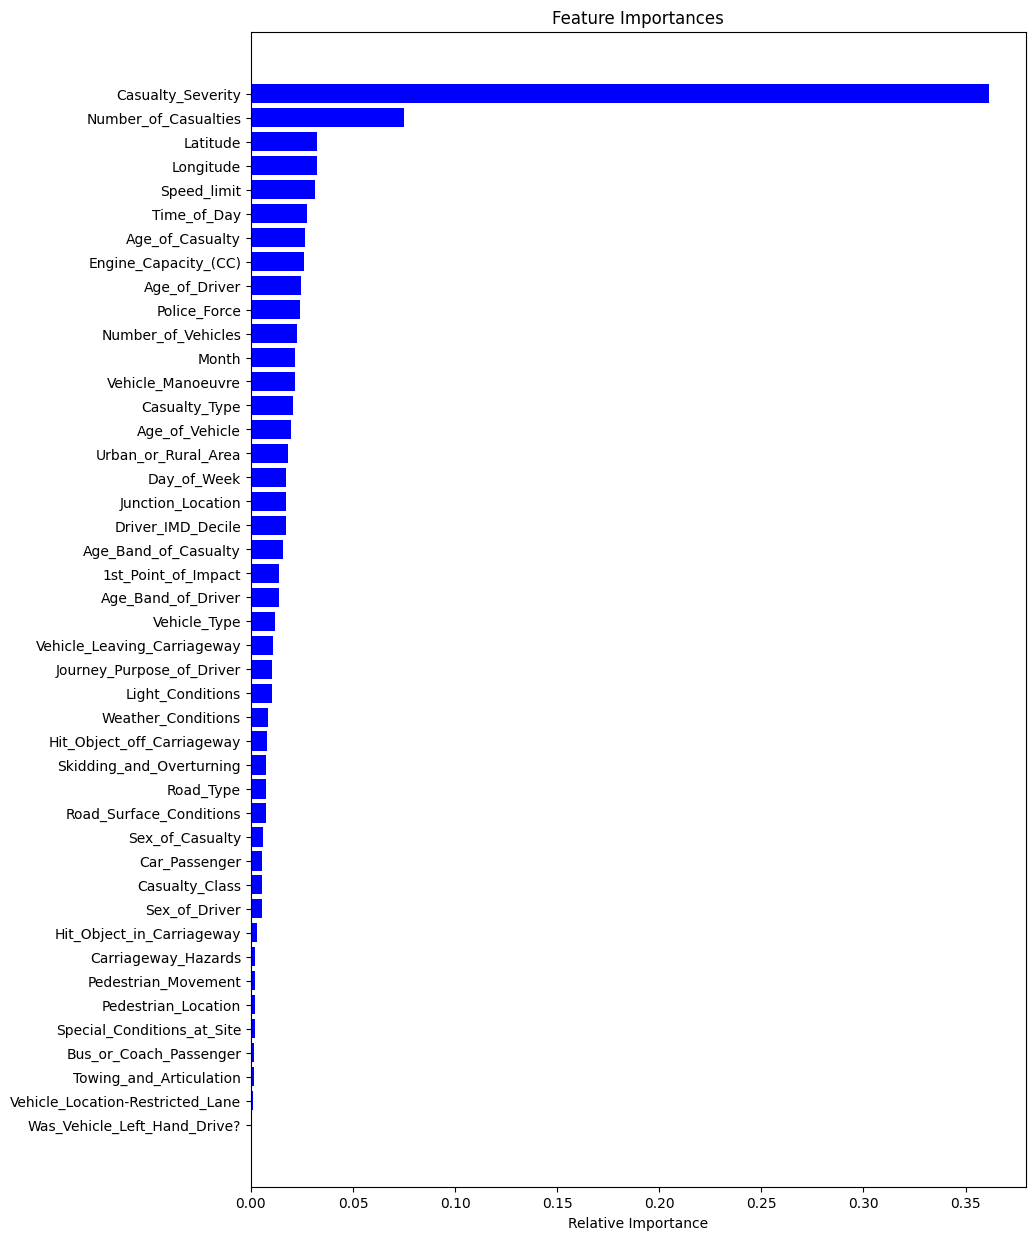

In [16]:
rf.fit(X_train, y_train.tolist())
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This plot is an indicator of the impact each feature has on the model.

<br>

We can see that speed limit is one of the most influencial factors towards determining the severity of an accident.

In [15]:
explainer = shap.TreeExplainer(rf)
print(f"Expected value for class 1 (Fatal): {explainer.expected_value[0]}, class 2 (Serious): {explainer.expected_value[1]}, class 3 (Slight): {explainer.expected_value[2]}")

Expected value for class 1 (Fatal): 0.333584439254998, class 2 (Serious): 0.33456609899185497, class 3 (Slight): 0.3318494617531468


Let's see the dominant factors overall.

In [16]:
shap.initjs()
shap_values = explainer.shap_values(X_train.iloc[:100])
shap.force_plot(explainer.expected_value[0], np.array(shap_values)[0], X_train[:100])

Since shap takes a long time to execute, we have decided to limit the size of the dataset to 100 to demonstrate the use of SHAP values.

### Summary plot

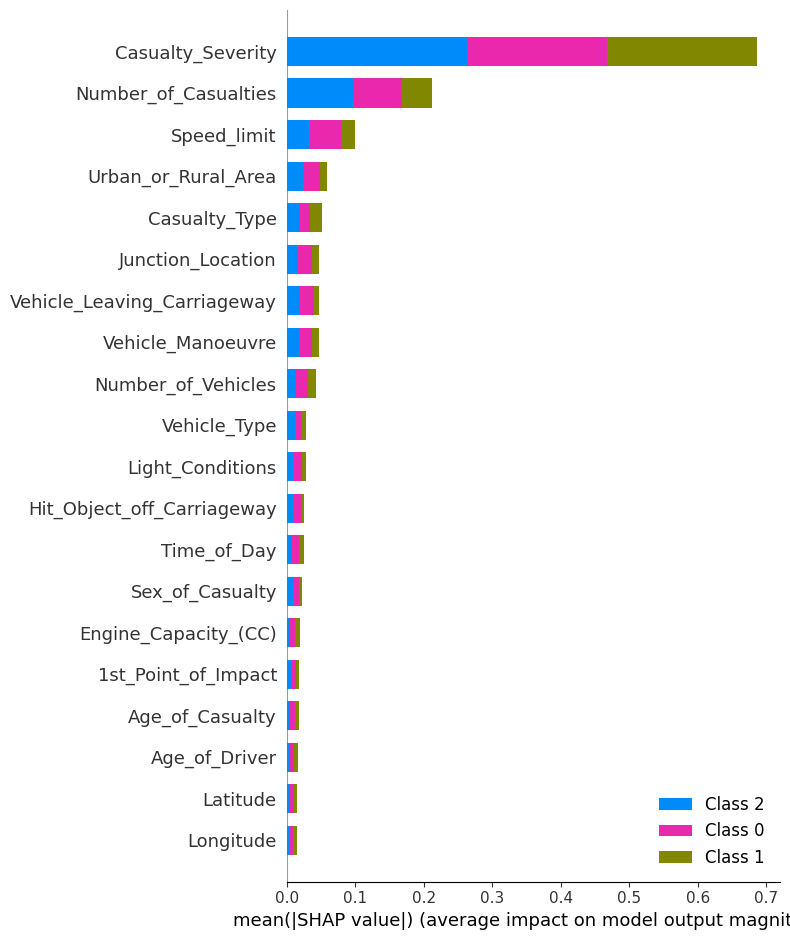

In [17]:
shap.summary_plot(shap_values, X_train.iloc[0:100], plot_type="bar")


Class 0 here refers to 'Fatal', Class 1 is 'Severe' and Class 2 is 'Slight'.

Shap value for each feature:

In [18]:

train_X_labels = X.columns[:-1]

vals = np.mean(np.abs(np.array(shap_values)[0]), axis = 0)
vals
for label, val in zip(train_X_labels, vals):
  print(f"SHAP value for {label} is {val}")

SHAP value for Longitude is 0.004887930530014273
SHAP value for Latitude is 0.005977970591766036
SHAP value for Police_Force is 0.0049884805989503685
SHAP value for Number_of_Vehicles is 0.016435444624449912
SHAP value for Number_of_Casualties is 0.07178416658623207
SHAP value for Day_of_Week is 0.0027449745311789162
SHAP value for Road_Type is 0.004110569041974674
SHAP value for Speed_limit is 0.047175785568243
SHAP value for Light_Conditions is 0.013098776035650737
SHAP value for Weather_Conditions is 0.002324568983445517
SHAP value for Road_Surface_Conditions is 0.0017651027882502027
SHAP value for Special_Conditions_at_Site is 0.0012432363171751724
SHAP value for Carriageway_Hazards is 0.000903715293020811
SHAP value for Urban_or_Rural_Area is 0.026037485781301477
SHAP value for Vehicle_Type is 0.009370363875892844
SHAP value for Towing_and_Articulation is 0.0010928660557809509
SHAP value for Vehicle_Manoeuvre is 0.019073286772351532
SHAP value for Vehicle_Location-Restricted_Lane 

SHAP (SHapley Additive exPlanations) values are a method for explaining the output of any machine learning model. They provide a way to quantify the contribution of each input feature to the final prediction of the model.

Casualty Severity and Number of casualties are intuitively correlated with Accident Severity. Ignoring those, we can observe that 'Speed Limit', followed by whether the accident location was in a rural or urban area, has the highest contribution towards the target, i.e. accident severity.